In [317]:
from sklearn.datasets import load_iris

In [318]:
from sklearn.preprocessing import KBinsDiscretizer

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [320]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [321]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [322]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [323]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [324]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [325]:
X = iris.data[:,[2,3]]
y = iris.target

In [326]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [327]:
import seaborn as sns

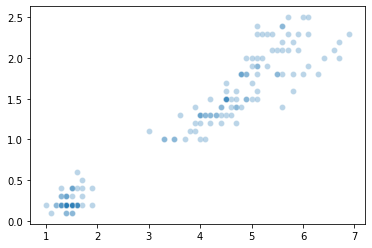

In [328]:
sns.scatterplot(X[:,0],X[:,1],alpha=0.3)

### 无监督分箱

In [329]:
kbd_cut = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

In [330]:
print(kbd_cut)

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')


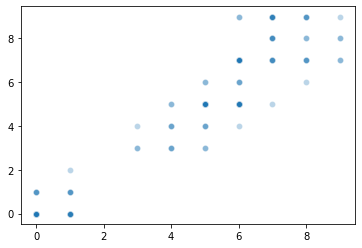

In [331]:
xd1 = kbd_cut.fit_transform(X)
sns.scatterplot(xd1[:,0],xd1[:,1],alpha=0.3)

In [332]:
xd1

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 2.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [6., 5.],
       [5., 5.],
       [6., 5.],
       [5., 5.],
       [6., 5.],
       [5., 5.],
       [6., 6.],
       [3., 3.],
       [6., 5.

In [333]:
kbd_cut1 = KBinsDiscretizer(n_bins=10,encode='onehot',strategy='uniform')
temp = kbd_cut1.fit_transform(X)
temp

<150x20 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements in Compressed Sparse Row format>

In [334]:
print(temp)

  (0, 0)	1.0
  (0, 10)	1.0
  (1, 0)	1.0
  (1, 10)	1.0
  (2, 0)	1.0
  (2, 10)	1.0
  (3, 0)	1.0
  (3, 10)	1.0
  (4, 0)	1.0
  (4, 10)	1.0
  (5, 1)	1.0
  (5, 11)	1.0
  (6, 0)	1.0
  (6, 10)	1.0
  (7, 0)	1.0
  (7, 10)	1.0
  (8, 0)	1.0
  (8, 10)	1.0
  (9, 0)	1.0
  (9, 10)	1.0
  (10, 0)	1.0
  (10, 10)	1.0
  (11, 1)	1.0
  (11, 10)	1.0
  (12, 0)	1.0
  :	:
  (137, 17)	1.0
  (138, 6)	1.0
  (138, 17)	1.0
  (139, 7)	1.0
  (139, 18)	1.0
  (140, 7)	1.0
  (140, 19)	1.0
  (141, 6)	1.0
  (141, 19)	1.0
  (142, 6)	1.0
  (142, 17)	1.0
  (143, 8)	1.0
  (143, 19)	1.0
  (144, 7)	1.0
  (144, 19)	1.0
  (145, 7)	1.0
  (145, 19)	1.0
  (146, 6)	1.0
  (146, 17)	1.0
  (147, 7)	1.0
  (147, 17)	1.0
  (148, 7)	1.0
  (148, 19)	1.0
  (149, 6)	1.0
  (149, 17)	1.0


In [335]:
kbd_cut2 = KBinsDiscretizer(n_bins=10,encode='onehot-dense',strategy='uniform')
temp = kbd_cut2.fit_transform(X)
temp

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [336]:
for i in temp:
    print(i)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


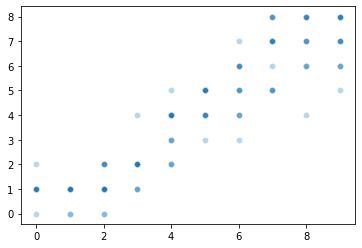

In [337]:
kbd_qcut = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
xd2 = kbd_qcut.fit_transform(X)
sns.scatterplot(xd2[:,0],xd2[:,1],alpha=0.3)

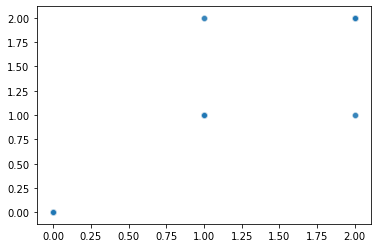

In [338]:
kbd_mean = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')
xd3 = kbd_mean.fit_transform(X)
sns.scatterplot(xd3[:,0],xd3[:,1],alpha=0.3)

In [339]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf,X,y,cv=5)
score1 = cross_val_score(clf,xd1,y,cv=5)
score2 = cross_val_score(clf,xd2,y,cv=5)
score3 = cross_val_score(clf,xd3,y,cv=5)

In [340]:
import numpy as np
np.mean(score)

0.9533333333333334

In [341]:
np.mean(score1)

0.96

In [342]:
np.mean(score2)

0.9400000000000001

In [343]:
np.mean(score3)

0.9733333333333334

### 有监督分箱
#### 基于信息熵的分箱

In [344]:
import entropy_based_binning as ebb
import pandas as pd

In [345]:
 y = y.reshape(150,-1)

In [346]:
df = np.concatenate((X*10,y),axis=1)

In [347]:
df

array([[14.,  2.,  0.],
       [14.,  2.,  0.],
       [13.,  2.,  0.],
       [15.,  2.,  0.],
       [14.,  2.,  0.],
       [17.,  4.,  0.],
       [14.,  3.,  0.],
       [15.,  2.,  0.],
       [14.,  2.,  0.],
       [15.,  1.,  0.],
       [15.,  2.,  0.],
       [16.,  2.,  0.],
       [14.,  1.,  0.],
       [11.,  1.,  0.],
       [12.,  2.,  0.],
       [15.,  4.,  0.],
       [13.,  4.,  0.],
       [14.,  3.,  0.],
       [17.,  3.,  0.],
       [15.,  3.,  0.],
       [17.,  2.,  0.],
       [15.,  4.,  0.],
       [10.,  2.,  0.],
       [17.,  5.,  0.],
       [19.,  2.,  0.],
       [16.,  2.,  0.],
       [16.,  4.,  0.],
       [15.,  2.,  0.],
       [14.,  2.,  0.],
       [16.,  2.,  0.],
       [16.,  2.,  0.],
       [15.,  4.,  0.],
       [15.,  1.,  0.],
       [14.,  2.,  0.],
       [15.,  2.,  0.],
       [12.,  2.,  0.],
       [13.,  2.,  0.],
       [14.,  1.,  0.],
       [13.,  2.,  0.],
       [15.,  2.,  0.],
       [13.,  3.,  0.],
       [13.,  3.

In [348]:
df = ebb.bin_array(df,nbins=3,axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\entropy_based_binning\_main.py:95: RuntimeWarning: divide by zero encountered in log2
  h = -np.sum(np.ma.filled(pdf * np.log2(pdf), fill_value=0))
C:\ProgramData\Anaconda3\lib\site-packages\entropy_based_binning\_main.py:95: RuntimeWarning: invalid value encountered in multiply
  h = -np.sum(np.ma.filled(pdf * np.log2(pdf), fill_value=0))


In [349]:
df

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

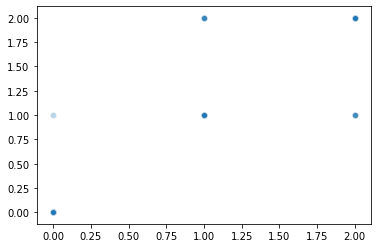

In [350]:
xd4 = df[:,:2]
sns.scatterplot(xd4[:,0],xd4[:,1],alpha=0.3)

In [351]:
score4 = cross_val_score(clf,xd4,y,cv=5)

In [352]:
np.mean(score4)

0.9333333333333332

#### 基于最小描述长度分箱

某汽车厂商推出了一款中高级轿车，在一次推广活动现场对10位参加活动的来宾进行了问卷调研。问卷当中有涉及到一个客户的收入情况以及购买该款车型的意愿。他们希望能够通过问卷的结果知道哪个收入阶层才是该款车型的消费主力。

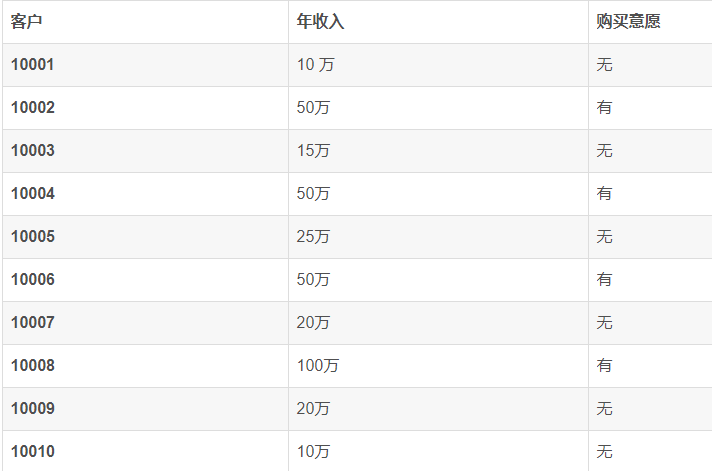

- 找到最优的切分点。选择切分点的标准就是信息增益最大；
- 分别计算不切分变量情况下的最小描述长度和按照最优点切分以后的最小描述长度；
- 比较两者最小描述长度的大小，如果前者的最小描述长度值大于后者，那么变量就应该需要切分，否则就放弃切分变量；
- 切分后的每一段又可以重复上述的步骤并最终得到所有的切分点。

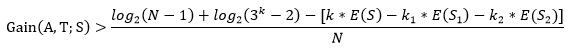

In [1]:
import mdlp

In [ ]:
mdlp.d

In [355]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [356]:
# X = X*10

In [294]:
# X = X.astype(np.int64)
# y = y.astype(np.int64)

In [357]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [358]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [363]:
cr = MDLP([1,2])
# y = check_array(y, ensure_2d=False, dtype=np.int64)
# y = check_array(y, ensure_2d=False, dtype=np.int64)
xd5 = cr.fit_transform(X,y)

ValueError: Buffer dtype mismatch, expected 'int64_t' but got 'long'

In [362]:
xd5

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

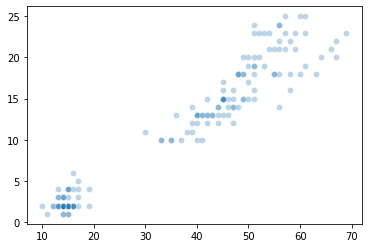

In [298]:
sns.scatterplot(xd5[:,0],xd5[:,1],alpha=0.3)

In [299]:
score5 = cross_val_score(clf,xd5,y,cv=5)
np.mean(score5)

0.9466666666666667

#### 类-属性相互依赖最大化分箱 Class-attribute interdependence maximization
https://github.com/airysen/caimcaim

In [ ]:
from caimcaim import CAIMD
caim = CAIMD()
xd6 = caim.fit_transform(X, y)

In [ ]:
sns.scatterplot(xd6[:,0],xd6[:,1],alpha=0.3)

In [ ]:
score6 = cross_val_score(clf,xd6,y,cv=5)
np.mean(score6)